In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [118]:
data_set = pd.read_csv('archive/drebin-215-dataset-5560malware-9476-benign.csv')
target = data_set['class']
original_dataset= data_set
original_dataset['class'] = original_dataset['class'].map({'S': 1, 'B': 0})
print(len(target.loc[target=='S']))
target = [1 if x == 'S' else 0 for x in target]
data_set_x = data_set.drop(['class'], axis=1)
unique_classes = np.unique(np.array(target))
print(f"Unique classes: {unique_classes}")

#print(data_set.iloc[:, 92])
data_set.info()
data_set.head()

5560
Unique classes: [0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(215), object(1)
memory usage: 24.8+ MB


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_12685/3675092542.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv('archive/drebin-215-dataset-5560malware-9476-benign.csv')


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_12685/1700440469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data_set.corr().abs()
/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_12685/1700440469.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = original_dataset[original_dataset.columns[1:]].corr()['class'][:].to_numpy()


(array([213]),)
['bindService', 'attachInterface', 'ServiceConnection', 'SecretKey', 'IBinder', 'android.os.IBinder', 'SUBSCRIBED_FEEDS_READ']


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_12685/1700440469.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_set.corr().shape)


(215, 215)


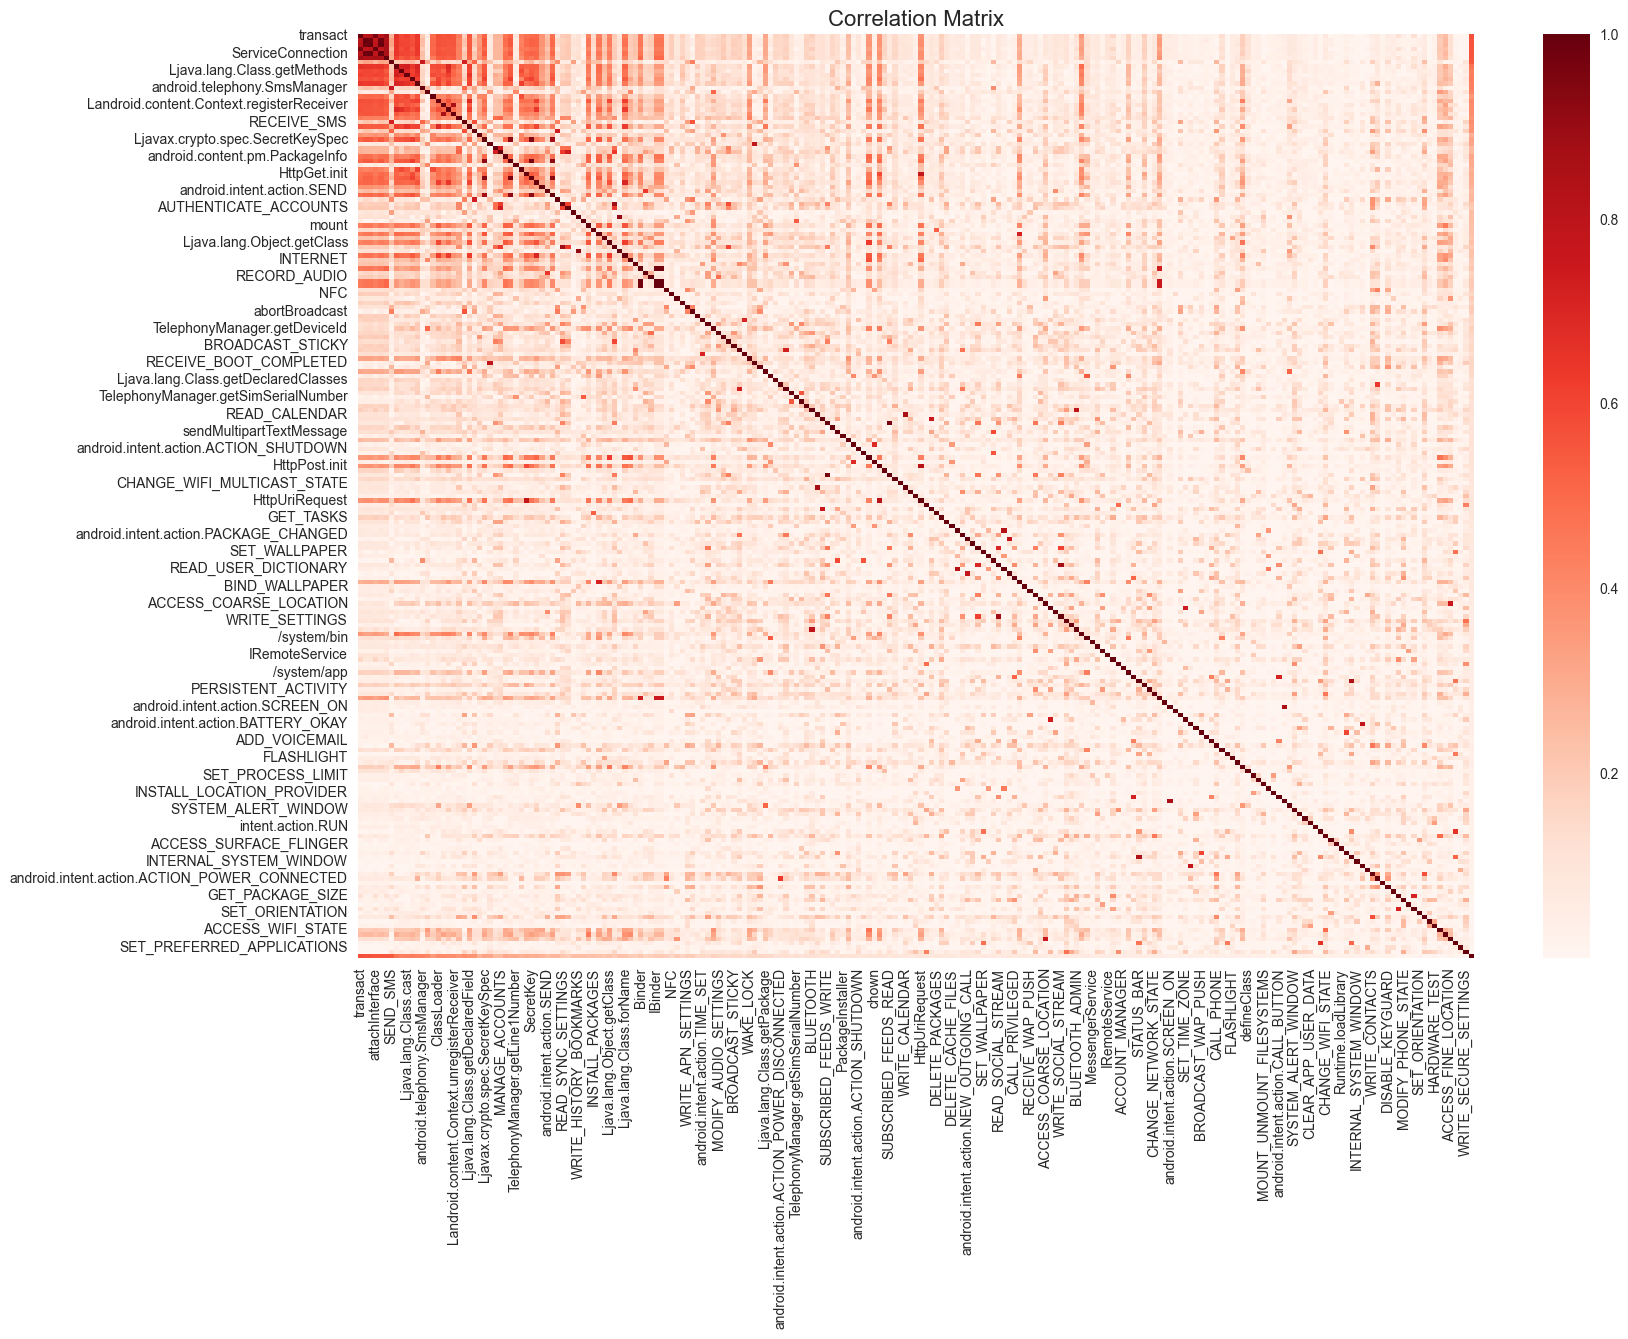

In [119]:
fig = plt.figure(figsize=(18, 12))
cor_matrix = data_set.corr().abs()
#print(original_dataset.head())
correlation = original_dataset[original_dataset.columns[1:]].corr()['class'][:].to_numpy()
print(np.where(abs(correlation) > 0.95))
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)
sns.heatmap(cor_matrix,  cmap=plt.cm.Reds)
print(data_set.corr().shape)
#plt.matshow(data_set.corr(), fignum=1)
#plt.xticks(range(len(data_set.columns)), data_set.columns, fontsize=14, rotation=90)
#plt.yticks(range(len(data_set.columns)), data_set.columns, fontsize=14, rotation=90)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [120]:
# which column has a non real number
#print(np.argmin(data_set_x.applymap(np.isreal)))
#print(data_set_x.columns[np.argmin(data_set_x.applymap(np.isreal))])
#print(data_set_x.columns[92])
#print(type(data_set_x))
numeric_column = pd.to_numeric(data_set_x.loc[:, data_set_x.columns[92]], errors='coerce')
nan_rows = numeric_column.isna()

previous_data_set_x = data_set_x.copy()
#print(f"ROWs of {data_set_x.columns[92]} that are not numbers: \n{data_set_x.loc[nan_rows, data_set_x.columns[92]]}")
data_set_x[data_set_x.columns[92]] = pd.to_numeric(data_set_x[data_set_x.columns[92]], errors='coerce').fillna(0)
data_set_x = data_set_x.astype('int32')
print(f"new training x\n{ data_set_x.info()}")
print(f"old training x\n{ previous_data_set_x.info()}")
print(f"unique values in the dataset: {np.unique(data_set_x.to_numpy())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to WRITE_SECURE_SETTINGS
dtypes: int32(215)
memory usage: 12.3 MB
new training x
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to WRITE_SECURE_SETTINGS
dtypes: int64(214), object(1)
memory usage: 24.7+ MB
old training x
None
unique values in the dataset: [0 1]


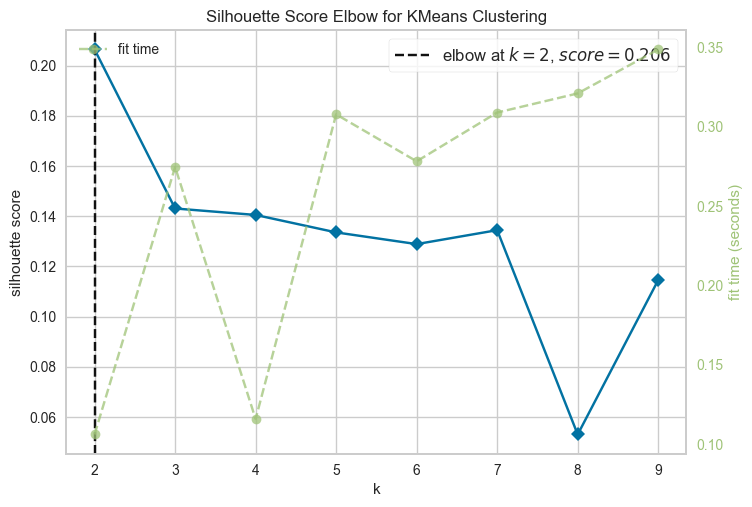

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [121]:

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(data_set_x) 
plt.legend()
visualizer.show() 



{'copy': True, 'iterated_power': 'auto', 'n_components': 2, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
15036
(15036, 2)
['bindService' 'android.intent.action.BOOT_COMPLETED']


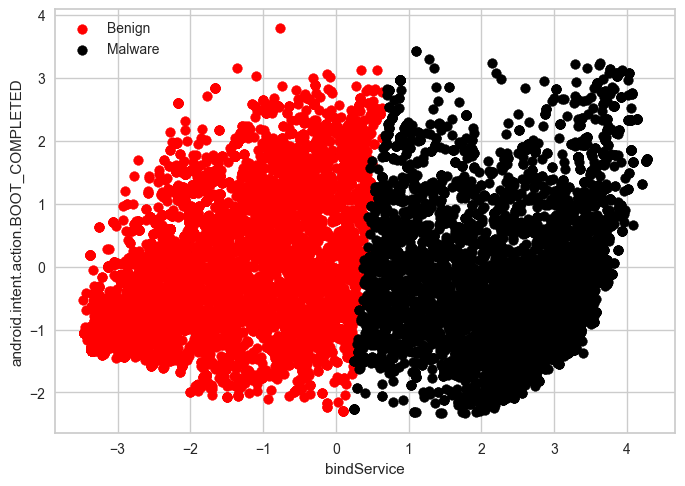

In [122]:
model = KMeans(n_clusters=2, n_init='auto')
pca = PCA(n_components=2)

data_pca_x = pca.fit_transform(data_set_x)
print(pca.get_params())
#print(data_pca_x)
label = model.fit_predict(data_set_x)
print(len(label))
print((data_pca_x.shape))
data_x_0 = data_pca_x[np.where(label == 0), 0]
data_x_1 = data_pca_x[np.where(label == 1), 0]
data_y_0 = data_pca_x[np.where(label == 0), 1]
data_y_1 = data_pca_x[np.where(label == 1), 1]
abs_loadings = abs(pca.components_)


max_loading_idxs = abs_loadings.argmax(axis=1)

selected_columns = data_set.columns[max_loading_idxs].values
print(selected_columns)
plt.scatter( data_x_0, data_y_0 , color = 'red', label="Benign")
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.scatter(data_x_1 , data_y_1 , color = 'black', label="Malware")
plt.legend(loc='upper left')
plt.show()

In [123]:

def GridSearchFun(model, metric, parameters, X_train, X_test, Y_train, Y_test, model_name='', weights=None):
    """Grid Search to find best hyperparameters
    Args:
        model (any): model 
        metric (string): choose the best model according with the metric
        parameters (_type_): set of different parameters
        X_train (_type_): training set (X)
        X_test (_type_): test set (X)
        Y_train (_type_): training set (Y)
        Y_test (_type_): test set (Y)
        model_name (str, optional): model's name. Defaults to ''.
    """    ''''''
    print(f"training model: {model_name}")
    clf = GridSearchCV(model, parameters, scoring=[
                       'f1'], n_jobs=-1,  refit='f1', cv=StratifiedKFold())
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    prec, recall, f1beta, _ = precision_recall_fscore_support(
        Y_test, pred,  average='binary', zero_division=1)
    f1 = 2.*(prec*recall)/(prec+recall)
    print("precision, recall, f1 = ",)
    print(f"Best parameters for {model_name} are: \n {clf.best_params_}")
    
    return clf.best_estimator_

In [124]:
print(type(data_set_x))
data_set_x = data_set_x.to_numpy()
print(type(data_set_x))
#print(data_set_x)
print(type(target))
target = np.array(target)
X_train, X_test, y_train, y_test \
    = train_test_split(data_set_x, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)
weights = {0: np.count_nonzero(y_train == 0)/float(len(y_train)), 1: np.count_nonzero(y_train == 1)/float(len(y_train))}

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'list'>


In [125]:
#sample_weight = np.array([np.count_nonzero(y_train == 0),np.count_nonzero(y_train == 1) ])
max_iters = (300,  600)
activations = ('identity', 'logistic', 'tanh', 'relu')
solvers = ('sgd', 'adam')
#learning_rates = ('constant', 'invscaling', 'adaptive')
learning_rates = ('constant', 'adaptive')
#shuffles = (True, False)
parameters = {'activation': activations, 'solver': solvers,
              'learning_rate': learning_rates, 'max_iter': max_iters}
mpl = MLPClassifier(early_stopping=True)

best_estimator_NN= GridSearchFun(mpl, 'balanced_accuracy', parameters, X_train, X_val,
                                              y_train, y_val, 'Neural Network')

training model: Neural Network
precision, recall, f1 = 
Best parameters for Neural Network are: 
 {'activation': 'relu', 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'adam'}


In [126]:

predict = best_estimator_NN.predict(X_test)
print(f"best estimator params: {best_estimator_NN.get_params()}")
print("balanced accuracy on the test set: ", balanced_accuracy_score(y_test, predict))
print("accuracy on the test set: ", accuracy_score(y_test, predict))

#scores = cross_val_score(\
#mpl, X_train, y_train, cv=5, scoring='accuracy')



best estimator params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
balanced accuracy on the test set:  0.9818971949997513
accuracy on the test set:  0.9837101063829787


Text(0, 0.5, 'training loss')

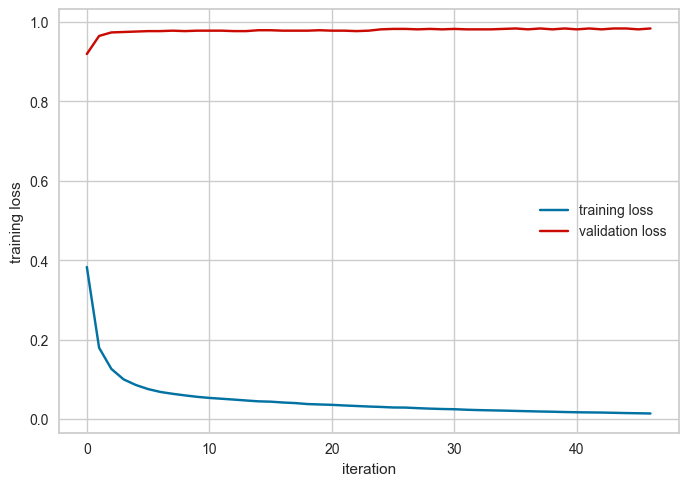

In [127]:
plt.plot(best_estimator_NN.loss_curve_, label="training loss")
plt.plot(best_estimator_NN.validation_scores_, c='r', label="validation loss")
plt.xlabel('iteration')
plt.legend()
plt.ylabel('training loss')

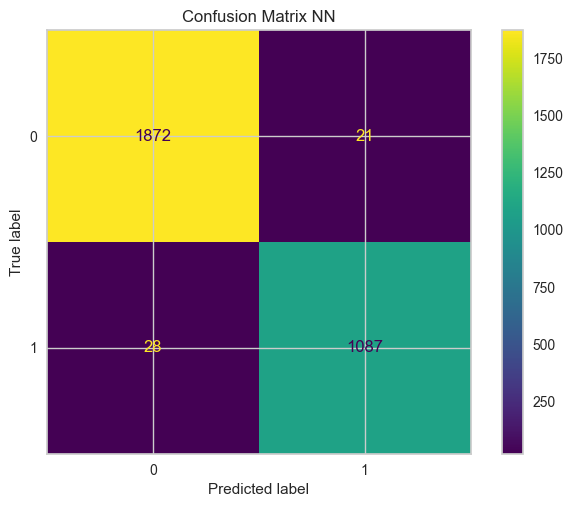

In [128]:
predictions = best_estimator_NN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_estimator_NN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_estimator_NN.classes_)
disp.plot()
plt.title("Confusion Matrix NN") 
plt.show()

In [129]:



print(f"Weights of classes: {list(weights.values())}")
model = GaussianNB()
#priors= (None, list(weights.values()))
parameters = {'var_smoothing': (1e-9, 1e-8, 1e-7)
              }
best_estimator_GNB= GridSearchFun(model, 'balanced_accuracy', parameters, X_train, X_val,
                                              y_train, y_val, 'Gaussian Naive Bayes')

predict = best_estimator_GNB.predict(X_test)
test_weights = [np.count_nonzero(y_test == 0)/len(y_test),np.count_nonzero(y_test == 1)/len(y_test)]
print("balanced accuracy on the test set: ", balanced_accuracy_score(y_test, predict))
print("accuracy on the test set: ", accuracy_score(y_test, predict))


Weights of classes: [0.6304179137567897, 0.36958208624321026]
training model: Gaussian Naive Bayes
precision, recall, f1 = 
Best parameters for Gaussian Naive Bayes are: 
 {'var_smoothing': 1e-07}
balanced accuracy on the test set:  0.7897754057312876
accuracy on the test set:  0.7446808510638298


<Figure size 1000x600 with 0 Axes>

<Figure size 800x550 with 0 Axes>

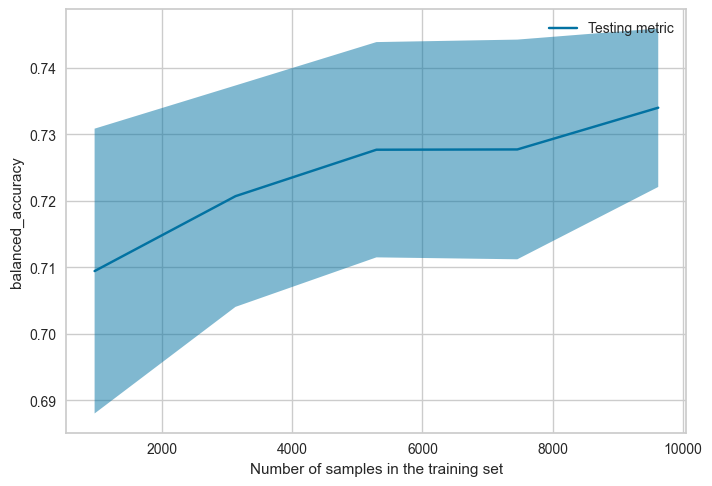

In [130]:

from sklearn.model_selection import ShuffleSplit, validation_curve
#cv = StratifiedKFold()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(10, 6))
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
common_params = {
    "X": np.concatenate([X_train, X_val]),
    "y": np.concatenate([y_train, y_val]),
    "cv": cv,
    "n_jobs": -1,

}
model = GaussianNB(var_smoothing= 1e-07)


train_sizes, train_scores, test_scores = learning_curve(model, **common_params)
display = LearningCurveDisplay(train_sizes=train_sizes,\
     train_scores=train_scores, test_scores=test_scores, score_name="balanced_accuracy")



fig=plt.figure()

display.plot()
plt.show()


#plt.legend(["Training Score", "Test Score"])

#plt.show()

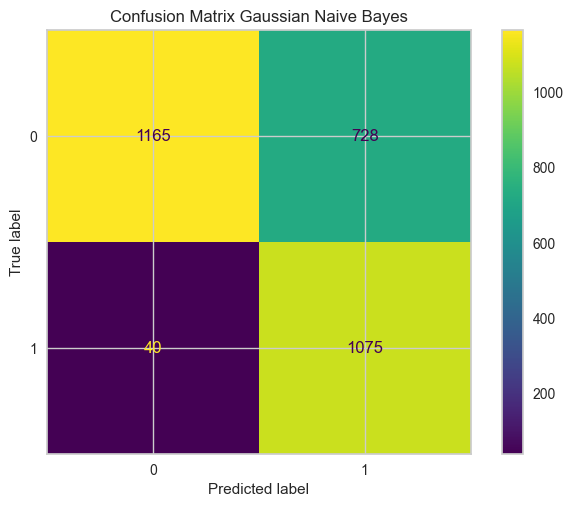

In [131]:
predictions = best_estimator_GNB.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_estimator_GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_estimator_GNB.classes_)
disp.plot()
plt.title("Confusion Matrix Gaussian Naive Bayes") 
plt.show()

In [132]:

criterion_dec_tree = ('gini', 'entropy')
splitter_dec_tree = ('best', 'random')
list1 = [None]
list2 = range(1, 10)
max_depth_dec_tree = [y for x in [list1, list2] for y in x]
min_samples_split_dec_tree = range(2, 10)
model = tree.DecisionTreeClassifier()

parameters = {'criterion': criterion_dec_tree, 'splitter': splitter_dec_tree,
              'max_depth': max_depth_dec_tree, 'min_samples_split': min_samples_split_dec_tree,
              }
best_estimator_dt = GridSearchFun(model, 'balanced_accuracy', parameters, X_train, X_val,
                                              y_train, y_val, 'Decision Tree ')
predict = best_estimator_dt.predict(X_test)
print("balanced accuracy on the test set: ", balanced_accuracy_score(y_test, predict))
print("accuracy on the test set: ", accuracy_score(y_test, predict))


training model: Decision Tree 
precision, recall, f1 = 
Best parameters for Decision Tree  are: 
 {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
balanced accuracy on the test set:  0.9672468073312345
accuracy on the test set:  0.96875


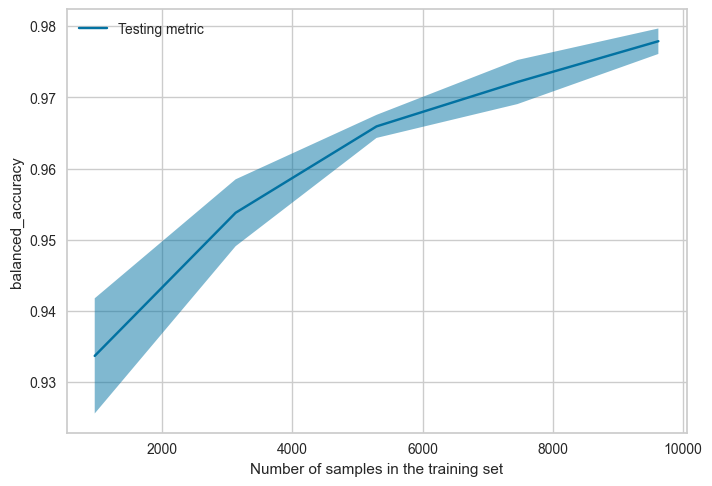

In [133]:

model = tree.DecisionTreeClassifier(**best_estimator_dt.get_params())
#cv = StratifiedKFold()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
common_params = {
    "X": np.concatenate([X_train, X_val]),
    "y": np.concatenate([y_train, y_val]),
    "cv": cv,
    "n_jobs": -1,

}

train_sizes, train_scores, test_scores = learning_curve(model, **common_params)
display = LearningCurveDisplay(train_sizes=train_sizes,\
     train_scores=train_scores, test_scores=test_scores, score_name="balanced_accuracy")


display.plot()
plt.show()

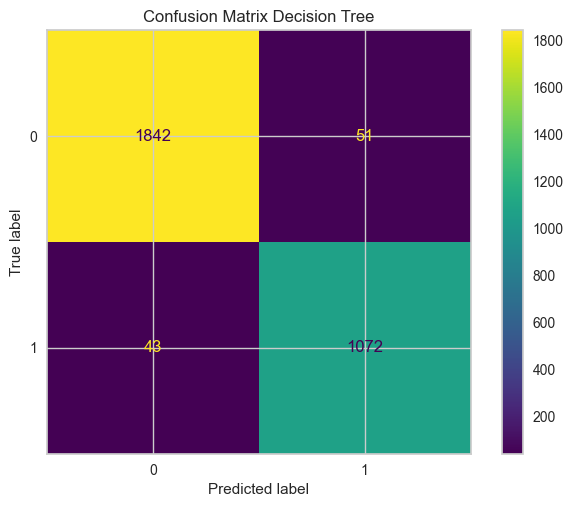

In [134]:
predictions = best_estimator_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_estimator_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_estimator_dt.classes_)
disp.plot()
plt.title("Confusion Matrix Decision Tree") 
plt.show()

In [157]:
# taking a malware sample from the test set
from sklearn.metrics import f1_score


np.set_printoptions(threshold=np.inf)
#np.set_printoptions(threshold=10)
#print((y_test))
dict_classes ={0: "benign", 1: "malware"}
print(X_test[0].copy())
bad_predictions ={model.__class__.__name__: [] for model in [best_estimator_dt, best_estimator_GNB, best_estimator_NN]}
for model in [best_estimator_dt, best_estimator_GNB, best_estimator_NN]:
    for prob in [0.1, 0.3, 0.5, 0.7, 1.]:
        malware = X_test[0].copy()
        print(f"Changing 0s to 1s with probability: {prob}")
        for i in range(len(malware.copy())):
            if(np.random.rand()<prob and malware[i]==0):
                malware[i]=1
        malware =malware.reshape((malware.shape[0], 1)).reshape(1, -1)
        #print(malware)
        np.set_printoptions(threshold=None)
        bad_pred = model.predict(malware)
        print(f"prediction of {model.__class__.__name__}: {dict_classes[bad_pred[0]]}")
        bad_predictions[model.__class__.__name__].append(bad_pred[0])
        #f1= f1_score(y_test[0].reshape(1,-1), bad_pred)
        #print(f"f1 score {f1}")
print(bad_predictions)
for key in bad_predictions.keys():
    count = sum(np.array(bad_predictions[key])/len(bad_predictions[key]))
    print(f"{key}: {count}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
Changing 0s to 1s with probability: 0.1
prediction of DecisionTreeClassifier: benign
Changing 0s to 1s with probability: 0.3
prediction of DecisionTreeClassifier: malware
Changing 0s to 1s with probability: 0.5
prediction of DecisionTreeClassifier: malware
Changing 0s to 1s with probability: 0.7
prediction of DecisionTreeClassifier: benign
Changing 0s to 1s with probability: 1.0
prediction of DecisionTreeClassifier: benign
Changing 0s to 1s with probability: 0.1
prediction of GaussianNB: benign
Changing 0s to 1s with probability: 0.3
prediction of GaussianN

In [197]:
# Improving model performance

data_set = pd.read_csv('archive/drebin-215-dataset-5560malware-9476-benign.csv')

original_dataset= data_set.copy()
original_dataset['class'] = original_dataset['class'].map({'S': 1, 'B': 0})




#print(data_set.iloc[:, 92])
data_set.info()
data_set.head()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)
target_2 = data_set["class"]
reduced_dataset = data_set.copy().drop(to_drop, axis=1)
rows_to_drop = reduced_dataset[reduced_dataset.eq('?').any(1)].index

# remove the rows containing "?"
reduced_dataset = reduced_dataset.drop(index=rows_to_drop)
print(reduced_dataset.shape)


target_2 = np.array([1 if x == 'S' else 0 for x in target_2])
target_2 = np.delete(target_2, rows_to_drop, axis=0)
reduced_dataset.drop(["class"], axis=1, inplace=True)
reduced_dataset = reduced_dataset.to_numpy()
X_train, X_test, y_train, y_test \
    = train_test_split(reduced_dataset, target_2, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB
['bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder', 'Landroid.content.Context.unregisterReceiver', 'KeySpec', 'SecretKey', 'Ljavax.crypto.Cipher', 'WRITE_SYNC_SETTINGS', 'READ_HISTORY_BOOKMARKS', 'IBinder', 'android.os.IBinder', 'SUBSCRIBED_FEEDS_READ', 'WRITE_CALENDAR', 'WRITE_SOCIAL_STREAM', 'android.intent.action.SCREEN_OFF']
(15031, 200)


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_12685/720919839.py:3: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv('archive/drebin-215-dataset-5560malware-9476-benign.csv')
/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_12685/720919839.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  rows_to_drop = reduced_dataset[reduced_dataset.eq('?').any(1)].index


In [198]:
max_iters = (300,  600)
activations = ('identity', 'logistic', 'tanh', 'relu')
solvers = ('sgd', 'adam')
#learning_rates = ('constant', 'invscaling', 'adaptive')
learning_rates = ('constant', 'adaptive')
#shuffles = (True, False)
parameters = {"init":["k-means++", "random"], 'n_init': ["auto", 10],
              'max_iter': [100, 300, 400], 'algorithm': ["lloyd", "elkan", "auto"]}
#mpl = MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 5))
kmeans = KMeans(n_clusters=2, random_state=0)
best_estimator_Kmeans =kmeans
best_estimator_Kmeans.fit(X_train)#GridSearchFun(kmeans, 'balanced_accuracy', parameters, X_train, X_val,
                        #                      y_train, y_val, 'Kmeans')
bad_predictions ={model.__class__.__name__: [] for model in [best_estimator_Kmeans]}
for model in [best_estimator_Kmeans]:
    for prob in [0.1, 0.3, 0.5, 0.7, 1.]:
        malware = X_test[0].copy()
        print(f"Changing 0s to 1s with probability: {prob}")
        for i in range(len(malware.copy())):
            if(np.random.rand()<prob and malware[i]==0):
                malware[i]=1
        
        malware =malware.reshape((malware.shape[0], 1)).reshape(1, -1)
        #print(malware)
        
        np.set_printoptions(threshold=None)
        bad_pred = model.predict(malware)
        print(f"prediction of {model.__class__.__name__}: {dict_classes[bad_pred[0]]}")
        bad_predictions[model.__class__.__name__].append(bad_pred[0])
        #f1= f1_score(y_test[0].reshape(1,-1), bad_pred)
        #print(f"f1 score {f1}")
print(bad_predictions)
for key in bad_predictions:
    count = sum(np.array(bad_predictions[key])/len(bad_predictions[key]))
    print(f"{key}: {count}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Changing 0s to 1s with probability: 0.1
prediction of KMeans: benign
Changing 0s to 1s with probability: 0.3
prediction of KMeans: malware
Changing 0s to 1s with probability: 0.5
prediction of KMeans: malware
Changing 0s to 1s with probability: 0.7
prediction of KMeans: malware
Changing 0s to 1s with probability: 1.0
prediction of KMeans: malware
{'KMeans': [0, 1, 1, 1, 1]}
KMeans: 0.8


In [199]:
predictions_kmeans = best_estimator_Kmeans.predict(X_test)
y_test = np.array([1 if x==0 else 0 for x in y_test])
print(balanced_accuracy_score(y_test, predictions_kmeans))

0.7312772758006024
